# 文本分类实例

## Step1 导入相关包

In [1]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

/data1/zhengnanyan/miniconda3/envs/LLMpython39/lib/python3.9/site-packages/transformers/utils/hub.py:124: FutureWarning: Using `TRANSFORMERS_CACHE` is deprecated and will be removed in v5 of Transformers. Use `HF_HOME` instead.
  warnings.warn(


## Step2 加载数据

In [2]:
import pandas as pd

data = pd.read_csv("./ChnSentiCorp_htl_all.csv")
data

,label,review
0,1,"距离川沙公路较近,但是公交指示不对,如果是""蔡陆线""的话,会非常麻烦.建议用别的路线.房间较..."
1,1,商务大床房，房间很大，床有2M宽，整体感觉经济实惠不错!
2,1,早餐太差，无论去多少人，那边也不加食品的。酒店应该重视一下这个问题了。房间本身很好。
3,1,宾馆在小街道上，不大好找，但还好北京热心同胞很多~宾馆设施跟介绍的差不多，房间很小，确实挺小...
4,1,"CBD中心,周围没什么店铺,说5星有点勉强.不知道为什么卫生间没有电吹风"
...,...,...
7761,0,尼斯酒店的几大特点：噪音大、环境差、配置低、服务效率低。如：1、隔壁歌厅的声音闹至午夜3点许...
7762,0,盐城来了很多次，第一次住盐阜宾馆，我的确很失望整个墙壁黑咕隆咚的，好像被烟熏过一样家具非常的...
7763,0,看照片觉得还挺不错的，又是4星级的，但入住以后除了后悔没有别的，房间挺大但空空的，早餐是有但...
7764,0,我们去盐城的时候那里的最低气温只有4度，晚上冷得要死，居然还不开空调，投诉到酒店客房部，得到...


In [3]:
data = data.dropna()
data

,label,review
0,1,"距离川沙公路较近,但是公交指示不对,如果是""蔡陆线""的话,会非常麻烦.建议用别的路线.房间较..."
1,1,商务大床房，房间很大，床有2M宽，整体感觉经济实惠不错!
2,1,早餐太差，无论去多少人，那边也不加食品的。酒店应该重视一下这个问题了。房间本身很好。
3,1,宾馆在小街道上，不大好找，但还好北京热心同胞很多~宾馆设施跟介绍的差不多，房间很小，确实挺小...
4,1,"CBD中心,周围没什么店铺,说5星有点勉强.不知道为什么卫生间没有电吹风"
...,...,...
7761,0,尼斯酒店的几大特点：噪音大、环境差、配置低、服务效率低。如：1、隔壁歌厅的声音闹至午夜3点许...
7762,0,盐城来了很多次，第一次住盐阜宾馆，我的确很失望整个墙壁黑咕隆咚的，好像被烟熏过一样家具非常的...
7763,0,看照片觉得还挺不错的，又是4星级的，但入住以后除了后悔没有别的，房间挺大但空空的，早餐是有但...
7764,0,我们去盐城的时候那里的最低气温只有4度，晚上冷得要死，居然还不开空调，投诉到酒店客房部，得到...


## Step3 创建Dataset

In [3]:
from torch.utils.data import Dataset

class MyDataset(Dataset):

    def __init__(self) -> None:
        super().__init__()
        self.data = pd.read_csv("./ChnSentiCorp_htl_all.csv")
        self.data = self.data.dropna()

    def __getitem__(self, index):
        return self.data.iloc[index]["review"], self.data.iloc[index]["label"]
    
    def __len__(self):
        return len(self.data)

In [4]:
dataset = MyDataset()
for i in range(5):
    print(dataset[i])

('距离川沙公路较近,但是公交指示不对,如果是"蔡陆线"的话,会非常麻烦.建议用别的路线.房间较为简单.', 1)
('商务大床房，房间很大，床有2M宽，整体感觉经济实惠不错!', 1)
('早餐太差，无论去多少人，那边也不加食品的。酒店应该重视一下这个问题了。房间本身很好。', 1)
('宾馆在小街道上，不大好找，但还好北京热心同胞很多~宾馆设施跟介绍的差不多，房间很小，确实挺小，但加上低价位因素，还是无超所值的；环境不错，就在小胡同内，安静整洁，暖气好足-_-||。。。呵还有一大优势就是从宾馆出发，步行不到十分钟就可以到梅兰芳故居等等，京味小胡同，北海距离好近呢。总之，不错。推荐给节约消费的自助游朋友~比较划算，附近特色小吃很多~', 1)
('CBD中心,周围没什么店铺,说5星有点勉强.不知道为什么卫生间没有电吹风', 1)


## Step4 划分数据集

In [5]:
from torch.utils.data import random_split


trainset, validset = random_split(dataset, lengths=[0.9, 0.1])
len(trainset), len(validset)

(6989, 776)

In [7]:
for i in range(10):
    print(trainset[i])

('我是第一次住公寓式的酒店，感觉很棒。一进客房特宽敞明亮。我住的是一室一厅套房，干净整洁，服务员的态度非常好。我是和姐姐一起过来的，她喜欢看日本台，这里能收到好多国际频道呢！楼上的餐厅也是我喜欢的那种画廊式餐厅，非常Mordern哦，如果是一家人来这里真的很超值方便呢，值得推荐一去啊～～～～补充点评2008年1月24日：房间很大很超值，远远高于三星级酒店的标准，可以跟四星级的媲美了呢～很棒～如果下次到北京我还是会到这', 1)
('见过差的四星，没见过这么差的四星。千万不要住，晚上还有骚扰电话', 0)
('酒店幻境很好超安静适合休息附近的公园景色舒适惬意晚餐不错不过方便没有商店比较困难', 1)
('观景大床房，住了2晚。酒店位置很好，距离虹桥机场只有不到10公里，出行、叫车都算方便。据说是人大培训用的酒店，三星标准。服务还可以，但是洗手间设施比较陈旧，淋浴间的下水不太通畅，毛巾也是很旧的样子。', 1)
('酒店很干净，窗外见山，山味很好闻。早餐不错，凉拌米粉特别好吃，小菜也好。餐厅价格比外面高，但卫生好很多，质量也较高，有一个靓妹很养眼。酒店位置好，闹中取静。总的来说，非常满意，特别是价格很便宜，180含双早，^_^。会推荐朋友来。补充点评2008年8月16日：可以刷卡的。', 1)
('地理位置好，主要是韩国人入住，早餐韩式的，房间比较干净，洗手间很小。', 1)
('听朋友介绍不错，因此出差选择了此酒店，一进酒店感觉院子很大、绿化很好，在大热天看着很舒服，停车场很大也很安全，对自驾游的朋友很合适，酒店大堂布置很古朴，透过大堂落地玻璃能看到外面庭院的风景，很雅致，就是大堂有点矮，房间很安静、干净，还有人性化的一键通服务，很方便，服务员也很有礼貌，看到客人会主动打招呼，总台的业务操作很熟练。就是不知怎么回事卫生间的门有点掉颜色，提醒要入住南林的朋友洗澡时不要把自己的衣服挂在门后，出门不远就是网师园、沧浪亭，在古城区该酒店房价也算不贵的，大致不错，值得推荐。', 1)
('房间还是不错的.至少在酒店式公寓里算是好的.前台不是很热情,毕竟是酒店式公寓,不是酒店,所受培训不是很够.酒店的ShuttleBus很方便,司机师傅也很热情,很好.推荐入住.', 1)
('除了离机场近,我实在想不到什么其他理由非得选择他.', 1)
('定得是豪华套间，但一点都不豪华。酒店

## Step5 创建Dataloader

dataloader的主要作用是将数据集转换为可以批量处理的形式，以提高训练和推理效率。

In [6]:
from torch.utils.data import DataLoader

trainLoader = DataLoader(trainset,batch_size=32,shuffle=True)
vaildLoader = DataLoader(validset,batch_size=64,shuffle=False)
next(enumerate(trainLoader)) # 一次取出32条数据，批处理

(0,
 [('我们去盐城的时候那里的最低气温只有4度，晚上冷得要死，居然还不开空调，投诉到酒店客房部，得到的答复是现在还没有领导指示需要开暖气，如果冷到话可以多给一床被子，太可怜了。。。',
   '位置好,去莫家街\\华联\\大十字等都非常方便,服务卫生不错,自助早餐丰盛,经济间稍小,性价比高.',
   '位置靠近区体校，不是正市区中心，但交通都算方便，离火车站也近。各方面都为标准4星酒店，服务比较热情，可能和管理有关。以前都是住凤凰，甬江的，这次在机场看到有酒店人员打着免费接机的牌子就注意上了，回程就住到该酒店，去机场只要和前台预约一下就可以了，一个人都送机。对于往返机场的旅客还是很方便的。',
   '环境差得很.进房间就一股丑味.设施简陋,电视不清楚,最重要的是房间价格,自己到店大堂可以还价,价格比携程价还要低,携程210的到店里可以还到180.',
   '可能是因为订的是特惠大床房,空间相当小,厕所的空闲也很小,就在床边上.感觉真的是寸土寸金.酒店更像是公寓,隔音也不好,肯定一点就是还比较干净.宾馆反馈2008年7月21日：非常感谢您的评价，如果您需要更大的空间，下次入住时可以选择我们面积更大的豪华房或套房。隔音问题我们会立即检查并做改进。衷心希望您再次光临南浦瑞峰酒店。',
   '用餐一般，价格比一般稍贵，签单付账时千万注意，因为它没有明细，只会写"零点餐"然后一个总金额"如"零点餐－－1032.00").如果是集团划账请千万注意多收费现象,而且周期很长,可能会花一个月时间在对账上.(请分清是销售在和您对账而不是财务).',
   '除了部分设施有点老之外，是很好的酒店。尤其是服务很到位！餐厅的服务员点错了菜，导致结账多了50多元，不用一分钟就立刻改正解决，很好！！',
   '这个酒店住过很多次的了，商务标间和豪华标间都住过。商务标间洗澡比豪华标间舒服，有个大花洒，不过浴缸都感觉不怎么干净，所以就没有用。酒店服务也不错。足浴的MM也不错，都挺漂亮的。早餐一般，将就着吃吃。酒店不远一条街，算是美食街吧，很多吃的，川菜特别多。总的感觉比临海另外一家四星的要好。',
   '自3月12号住进包头鞍山店,心里感觉很失望!房间环境还行,就是窗户不透气,服务质量很差,餐厅菜的品种少并价格贵,最可恨的是欺骗顾客,房间未有热水,不与顾客讲明,跟前台及服务员说了

In [13]:
# 上面的数据都是raw data，还需要做预处理，比如tokenization
# 可以使用collate_fn，在DataLoader取样本的时候，借助批处理，对样本进行预处理

In [7]:
import torch
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("hfl/rbt3")

def collate_func(batch):
    texts, labels = [], [] # 文本和标签分开存储
    for item in batch:
        texts.append(item[0])
        labels.append(item[1])
    # 对text做tokenization 
    inputs = tokenizer(texts, max_length=128, padding="max_length", truncation=True, return_tensors="pt")
    inputs["labels"] = torch.tensor(labels)
    return inputs

In [8]:
from torch.utils.data import DataLoader

# collate_fn：如何取样本的，我们可以定义自己的函数来准确地实现想要的功能。
trainloader = DataLoader(trainset, batch_size=32, shuffle=True, collate_fn=collate_func)
validloader = DataLoader(validset, batch_size=64, shuffle=False, collate_fn=collate_func)

In [24]:
next(enumerate(validloader))[1]

{'input_ids': tensor([[ 101, 1034, 1034,  ...,  100,  117,  102],
        [ 101,  100,  100,  ...,    0,    0,    0],
        [ 101,  976,  100,  ...,  100, 1030,  102],
        ...,
        [ 101,  100,  985,  ...,    0,    0,    0],
        [ 101,  100,  100,  ...,    0,    0,    0],
        [ 101,  100,  100,  ...,    0,    0,    0]]), 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'labels': tensor([0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
        1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
        1, 1, 0

## Step6 创建模型及优化器

In [9]:
from torch.optim import Adam # 优化器
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained("hfl/rbt3")

if torch.cuda.is_available():
    model = model.cuda()

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at hfl/rbt3 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [10]:
# 要优化哪些参数，学习率lr
optimizer = Adam(model.parameters(), lr=2e-5)

In [18]:
model

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(21128, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-2): 3 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, e

## Step7 训练与验证

In [14]:
def evaluate():
    model.eval() # 将模型设置为评估模式，这会影响一些层的行为，例如 Dropout 层在评估时会关闭。
    acc_num = 0 # 预测对的个数
    with torch.inference_mode():
        for batch in validloader: # 验证集
            if torch.cuda.is_available():
                batch = {k: v.cuda() for k, v in batch.items()}
            output = model(**batch)
            # outputs.logits 模型的输出中预测的原始分数或概率。 huggingface得到的都是logits 
            # torch.argmax 函数计算每个样本预测的最高分数或概率所对应的类别索引。
            pred = torch.argmax(output.logits, dim=-1)
            # 当前batch预测对的个数，所以有sum
            acc_num += (pred.long() == batch["labels"].long()).float().sum()
    return acc_num / len(validset)

def train(epoch=3, log_step=100):  # epoch：几轮
    global_step = 0
    # 训练
    for ep in range(epoch):
        model.train()
        for batch in trainloader:
            if torch.cuda.is_available(): # 判断是否有gpu
                # 将批次中的所有数据移动到设备（例如 GPU）上进行训练。这是为了在 GPU 上加速训练过程。
                batch = {k: v.cuda() for k, v in batch.items()}
            optimizer.zero_grad() # 清空梯度，为下一个批次做准备
            # 将批次数据输入模型，获取模型的输出。**batch 表示将字典中的键值对解包为关键字参数
            output = model(**batch)
            output.loss.backward() # 通过反向传播计算损失关于模型参数的梯度
            optimizer.step() # 根据梯度更新模型参数
            if global_step % log_step == 0:
                print(f"ep: {ep}, global_step: {global_step}, loss: {output.loss.item()}")
            global_step += 1
        acc = evaluate()
        print(f"ep: {ep}, acc: {acc}")

In [11]:
for batch in trainloader:
    if torch.cuda.is_available(): # 判断是否有gpu
        # 将批次中的所有数据移动到设备（例如 GPU）上进行训练。这是为了在 GPU 上加速训练过程。
        batch = {k: v.cuda() for k, v in batch.items()}

In [12]:
batch

{'input_ids': tensor([[ 101, 3221,  671,  ...,    0,    0,    0],
         [ 101, 3683, 6772,  ...,    0,    0,    0],
         [ 101,  122,  119,  ..., 3221, 7305,  102],
         ...,
         [ 101, 2523, 5439,  ...,    0,    0,    0],
         [ 101,  857,  749,  ..., 2791, 6624,  102],
         [ 101, 3302, 1218,  ...,    0,    0,    0]], device='cuda:0'),
 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]], device='cuda:0'),
 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 1, 1, 1],
         ...,
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 1, 1, 1],
         [1, 1, 1,  ..., 0, 0, 0]], device='cuda:0'),
 'labels': tensor([1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0], device='cuda:0')}

In [ ]:
# 上面的device='cuda:0'
model.cuda(2)

cuda都是从0 开始数的

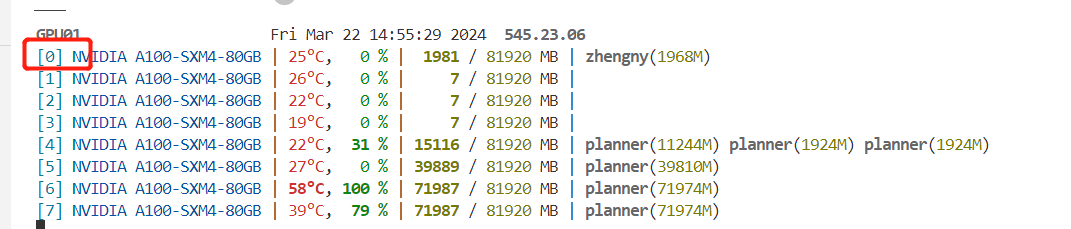

## Step8 模型训练

In [15]:
train()

ep: 0, global_step: 0, loss: 0.7754237651824951
ep: 0, global_step: 100, loss: 0.2832787334918976
ep: 0, global_step: 200, loss: 0.16568639874458313
ep: 0, acc: 0.8853092789649963
ep: 1, global_step: 300, loss: 0.4200381934642792
ep: 1, global_step: 400, loss: 0.2362835854291916
ep: 1, acc: 0.9033504724502563
ep: 2, global_step: 500, loss: 0.2246057540178299
ep: 2, global_step: 600, loss: 0.08999053388834
ep: 2, acc: 0.9007731676101685


## Step9 模型预测

In [17]:
sen = "我觉得这家酒店不错，饭很好吃！"
id2_label = {0: "差评！", 1: "好评！"}
model.eval() # 将模型设置为评估模式
with torch.inference_mode():
    inputs = tokenizer(sen, return_tensors="pt") # 输入还是要分词
    inputs = {k: v.cuda() for k, v in inputs.items()}
    logits = model(**inputs).logits # 获得预测结果，是logits
    pred = torch.argmax(logits, dim=-1) # 选择最大概率，就是pred预测结果类别
    print(pred.item())
    print(f"输入：{sen}\n模型预测结果:{id2_label.get(pred.item())}") # 数到label的转变

1
输入：我觉得这家酒店不错，饭很好吃！
模型预测结果:好评！


In [17]:
from transformers import pipeline

model.config.id2label = id2_label
pipe = pipeline("text-classification", model=model, tokenizer=tokenizer, device=0)

In [18]:
pipe(sen)

[{'label': '好评！', 'score': 0.9968716502189636}]